# Dataset Overview

본 데이터는 Kaggle에 공개된 *MyAnimeList Top 10,000 Anime Dataset*을 기반으로 한다.  
MyAnimeList(MAL)는 전 세계 애니메이션 팬들이 작품을 평가하고 리스트에 등록하는 대표적인 플랫폼이다.

- 데이터 출처: Kaggle (MyAnimeList Top 10,000 Anime Dataset)
    - https://www.kaggle.com/datasets/furkanark/myanimelist-top-10000-anime-dataset
- 표본 수: 9,999개 애니메이션
- 분석 단위: 작품 단위 (anime_id 기준)
- 기간 범위: 1956년 ~ 2025년
- 주요 목적: 애니메이션의 인기(log_members)에 영향을 미치는 요인 분석

본 프로젝트에서는 여러 raw 테이블을 통합하여 작품 단위 feature 테이블(feature_anime)을 구축하였다.

-----
# Variable Description

| 변수명 | 설명 | 해석 포인트 |
|--------|------|-------------|
| anime_id | 애니메이션 고유 ID | 작품 단위 식별자 |
| title | 작품명 | 식별용 변수 |
| score | MyAnimeList 사용자 평균 평점 | 작품의 질적 평가 |
| members | 작품을 리스트에 등록한 사용자 수 | 작품 인기의 대리 변수 |
| log_members | members의 로그 변환값 | 왜도 보정 후 모델링용 변수 |
| type | 작품 유형 (TV, Movie, OVA 등) | 작품 형식 |
| episodes | 총 에피소드 수 | 작품 규모 |
| start_date | 방영/개봉 시작일 | 연도 추출에 활용 |
| year | 방영/개봉 연도 | 산업 성장 효과 통제 변수 |
| popularity | MAL 내 인기 순위 (낮을수록 인기 높음) | 역순위 개념 |
| genre_count | 장르 개수 | 장르 다양성 |
| company_count | 참여 제작사 수 | 제작 규모 |
| studio_count | 참여 스튜디오 수 | 제작 구조 |
| producer_count | 참여 프로듀서 수 | 제작 참여 규모 |
| voice_actor_count | 전체 성우 수 | 캐스팅 규모 |
| japanese_va_count | 일본 성우 수 | 원어 성우 참여 규모 |


-----
# Data Preprocessing & EDA

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import mysql.connector

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
conn = mysql.connector.connect(
    host = "localhost",
    user = "[ID]",
    password = "[PASSWORD]",
    database = "anime_project"
)

df = pd.read_sql("SELECT * FROM feature_anime", conn)
conn.close()

df.head()

,anime_id,title,score,members,type,episodes,start_date,popularity,genre_count,company_count,studio_count,producer_count,voice_actor_count,japanese_va_count
0,1,Cowboy Bebop,8.75,2014470,TV,26,1998-01-01,42,5,4,1,3,18,18
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,404634,Movie,1,2001-01-01,650,4,3,1,2,17,17
2,6,Trigun,8.22,817570,TV,26,1998-01-01,265,4,3,1,2,18,18
3,7,Witch Hunter Robin,7.23,126303,TV,26,2002-01-01,1982,4,4,1,3,15,15
4,8,Bouken Ou Beet,6.92,16486,TV,52,2004-01-01,5773,4,3,1,2,10,10


In [3]:
df.shape

(9999, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   anime_id           9999 non-null   int64  
 1   title              9999 non-null   object 
 2   score              9999 non-null   float64
 3   members            9999 non-null   int64  
 4   type               9999 non-null   object 
 5   episodes           9999 non-null   int64  
 6   start_date         9997 non-null   object 
 7   popularity         9999 non-null   int64  
 8   genre_count        9999 non-null   int64  
 9   company_count      9999 non-null   int64  
 10  studio_count       9999 non-null   int64  
 11  producer_count     9999 non-null   int64  
 12  voice_actor_count  9999 non-null   int64  
 13  japanese_va_count  9999 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,anime_id,score,members,episodes,popularity,genre_count,company_count,studio_count,producer_count,voice_actor_count,japanese_va_count
count,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,24127.352335,6.980561,1.075413e+05,15.572457,6490.504650,3.116312,3.989699,1.142714,2.846985,15.296730,15.296730
std,19948.395388,0.619431,2.733630e+05,41.425016,4646.370323,1.991423,2.240178,0.411301,2.222876,22.236325,22.236325
min,1.000000,6.050000,2.260000e+02,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000
25%,4055.000000,6.470000,4.272500e+03,1.000000,2591.500000,2.000000,3.000000,1.000000,2.000000,7.000000,7.000000
50%,21405.000000,6.900000,1.818900e+04,11.000000,5564.000000,3.000000,3.000000,1.000000,2.000000,10.000000,10.000000
75%,40026.000000,7.390000,8.469750e+04,13.000000,9823.500000,4.000000,5.000000,1.000000,3.000000,17.000000,17.000000
max,62863.000000,9.290000,4.262220e+06,1787.000000,22184.000000,11.000000,21.000000,11.000000,20.000000,191.000000,191.000000


df.describe() 결과 해석
- score는 평균 6.98, 표준편차 0.62로 분산이 크지 않다.
    - 점수 예측은 설명력이 제한적일 가능성이 있다.

- members는 극단적으로 오른쪽으로 치우친 분포를 보인다.
    - 로그 변환이 필요하다.

- voice_actor_count 최대 191로 일부 초대형 작품이 존재한다.
    - 이상치 영향 여부 확인 필요하다.

- year 평균 2010으로 최근작 비중 높다.
    - 연도 효과 통제 필요하다.

In [6]:
# 결측치가 발생한 두 개의 행 확인
df[df["start_date"].isna()]

,anime_id,title,score,members,type,episodes,start_date,popularity,genre_count,company_count,studio_count,producer_count,voice_actor_count,japanese_va_count
6489,35129,Tottoko Hamtarou no Tottoko Taisetsu!! Koutsuu...,6.34,730,OVA,1,None,16108,1,4,2,2,2,2
7343,39226,Captain Tsubasa no Shouka Sakusen,6.21,917,OVA,1,None,15222,1,4,2,2,0,0


결측치를 대체할 방영년도 검색 결과 
- 35129 Tottoko Hamtarou no Tottoko Taisetsu!! Koutsuu Rule는 2003년으로 대체한다.
- 39226 Captain Tsubasa no Shouka Sakusen은 1983년 TV 시리즈 연계 프로모션 성격의 OVA로 분류되는 경우가 많아, 1983년으로 대체하도록 한다.

In [7]:
df.loc[df["anime_id"] == 35129, "start_date"] = "2003-01-01"
df.loc[df["anime_id"] == 39226, "start_date"] = "1983-01-01"

In [8]:
# 날짜 데이터 타입 변환
df["start_date"] = pd.to_datetime(df["start_date"])
df["year"] = df["start_date"].dt.year

In [9]:
# 로그 변환
df["log_members"] = np.log1p(df["members"])

## Log Members 분포
인기 변수의 분포 특성을 확인하고 왜도 문제를 완화하기 위해 log 변환된 members의 분포를 시각화한다.

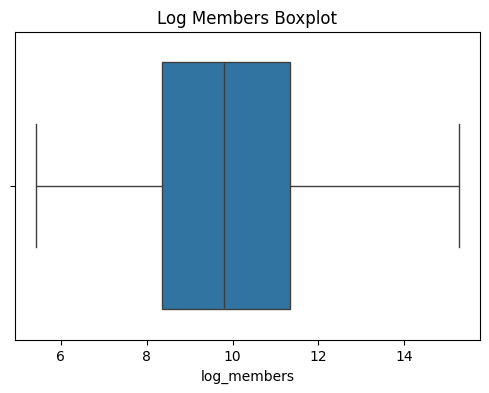

In [10]:
# log_members의 분포 및 이상치 확인
plt.figure(figsize = (6,4))
sns.boxplot(x = df["log_members"])
plt.title("Log Members Boxplot")
plt.show()

Log Members Boxplot 그래프 해석
- 중앙값 10 근처로 나타났다.
- IQR 대략 8.5 ~ 11.5
- 극단적 이상치가 발견되지 않았다.
- 로그 변환으로 분포가 안정되었다.

## Type별 비교
작품 유형이 인기 수준에 구조적 차이를 보이는지 확인하기 위해 type별 log_members 분포를 비교한다.

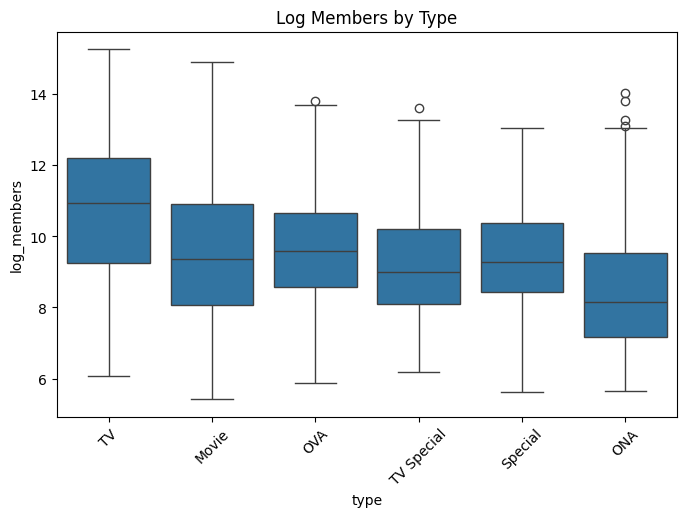

In [11]:
# type별 차이 (TV / Movie / OVA)
plt.figure(figsize = (8,5))
sns.boxplot(data = df, x = "type", y = "log_members")
plt.xticks(rotation = 45)
plt.title("Log Members by Type")
plt.show()

Log Members by Type 그래프 해석
- TV가 가장 높은 중앙값, ONA가 가장 낮은 중앙값을 나타낸다.
- 타입별 분포 차이가 명확하므로, 작품 유형(type)에 따라 인기 수준이 구조적으로 다르다.
- 특히 TV 시리즈는 대체적으로 높은 인기를 보인다.
- 범주형 변수 더미화 필요하다.

## 연도 트렌드
시간에 따른 산업 성장 효과를 확인하기 위해 연도별 평균 log_members 추이를 분석한다.

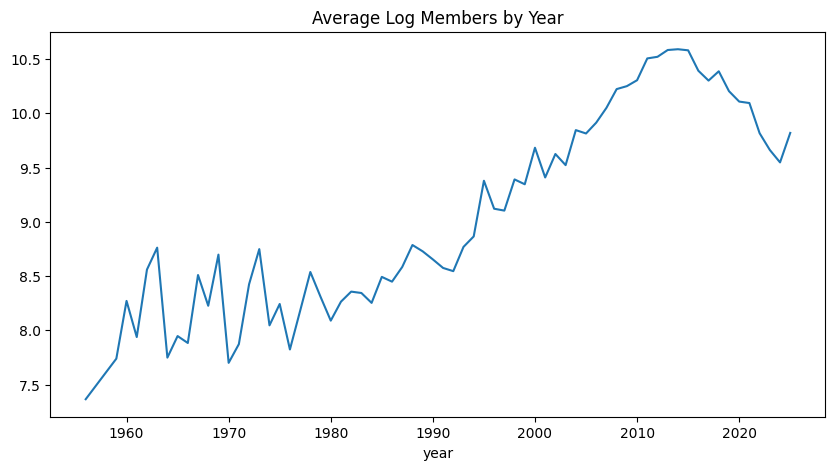

In [12]:
# 연도별 트렌드
df.groupby("year")["log_members"].mean().plot(figsize = (10,5))
plt.title("Average Log Members by Year")
plt.show()

Average Log Members by Year 그래프 해석
- 장기적으로 상승 추세를 보인다.
- 2010년대 정점이었으나, 최근 약간 감소하는 추세이다.
- 즉, 애니메이션 시장은 장기적으로 성장해 왔으며, 최근 작품일수록 평균 인기가 높은 경향이 있다. 이는 플랫폼 확대 및 글로벌 팬덤 증가의 영향일 가능성이 있다.

-----
# Correlation Analysis

In [13]:
# 상관계수
numeric_cols = [
    "score",
    "log_members",
    "genre_count",
    "company_count",
    "studio_count",
    "producer_count",
    "voice_actor_count",
    "japanese_va_count",
    "year"
]

corr = df[numeric_cols].corr()
corr

,score,log_members,genre_count,company_count,studio_count,producer_count,voice_actor_count,japanese_va_count,year
score,1.000000,0.621491,0.261371,0.200103,-0.122208,0.224272,0.058996,0.058996,0.194564
log_members,0.621491,1.000000,0.353120,0.443625,-0.159052,0.476507,0.103193,0.103193,0.237093
genre_count,0.261371,0.353120,1.000000,0.151673,-0.066427,0.165144,0.072443,0.072443,0.008237
company_count,0.200103,0.443625,0.151673,1.000000,0.133706,0.983044,0.029790,0.029790,0.280442
studio_count,-0.122208,-0.159052,-0.066427,0.133706,1.000000,-0.050285,-0.032584,-0.032584,0.020070
producer_count,0.224272,0.476507,0.165144,0.983044,-0.050285,1.000000,0.036051,0.036051,0.278911
voice_actor_count,0.058996,0.103193,0.072443,0.029790,-0.032584,0.036051,1.000000,1.000000,-0.129004
japanese_va_count,0.058996,0.103193,0.072443,0.029790,-0.032584,0.036051,1.000000,1.000000,-0.129004
year,0.194564,0.237093,0.008237,0.280442,0.020070,0.278911,-0.129004,-0.129004,1.000000


변수 간 전반적인 선형 관계를 종합적으로 확인하기 위해 상관계수 행렬을 분석한다.

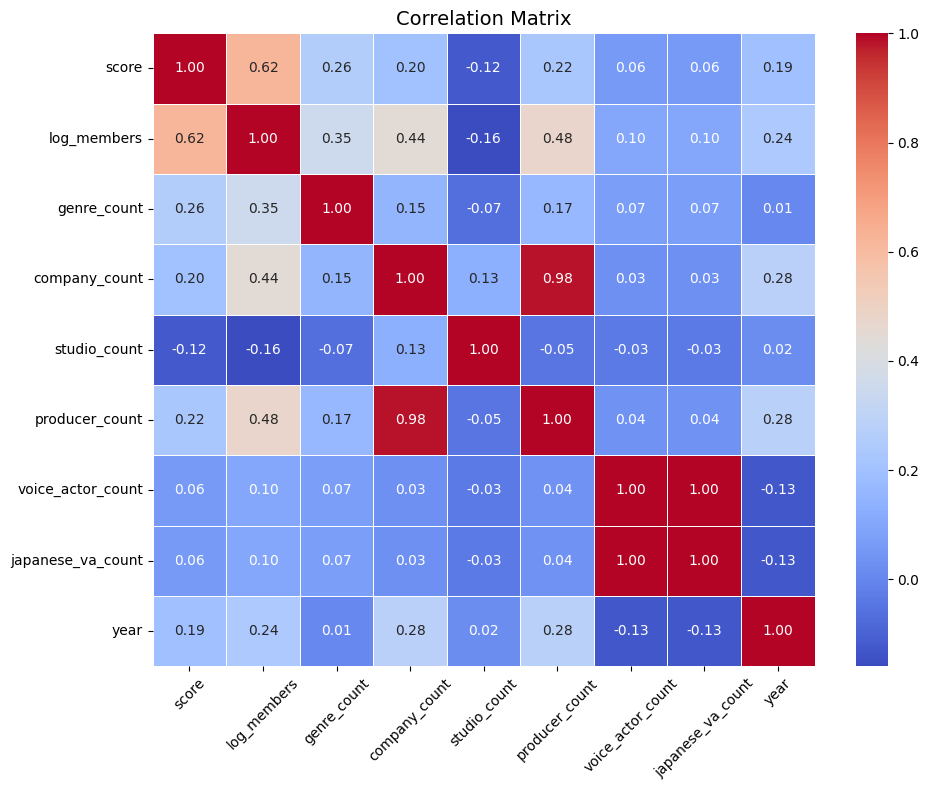

In [14]:
plt.figure(figsize = (10,8))
sns.heatmap(
    corr,
    annot = True,
    cmap = "coolwarm",
    fmt = ".2f",
    linewidths = 0.5
)

plt.title("Correlation Matrix", fontsize = 14)
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

Correlation Matrix 해석
- 평점(score)과 인기(log_members)
    - r = 0.62, 비교적 강한 양의 상관관계
    - 해석: 평점이 높은 작품일수록 대체로 높은 인기를 보인다. 그러나 완전한 상관은 아니므로, 고평점이 반드시 흥행을 보장하지는 않는다.
    - score는 인기의 중요한 설명 변수이지만, 독립적 영향 요인도 존재한다.

- 인기(log_members)와 제작 참여 규모
    - log_members ↔ producer_count = 0.48
    - log_members ↔ company_count = 0.44
    - 해석: 제작 및 참여 회사 수가 많을수록 작품의 인기가 높아지는 경향이 있다.
    - 설명 
        - 제작 규모가 클수록 마케팅/유통 네트워크 확대
        - 대형 프로젝트일수록 투자 규모가 큼
        - 산업 구조적 영향

- 장르 다양성과 성과
    - genre_count ↔ score = 0.26
    - genre_count ↔ log_members = 0.35
    - 해석: 복합 장르 작품일수록 다소 높은 평가와 인기를 얻는 경향이 있다.
        - 다양한 타겟층 확보 가능성
        - 단일 장르보다 시장 확장 가능성

- 성우 수의 영향
    - voice_actor_count ↔ log_members = 0.10
    - voice_actor_count ↔ score = 0.06
    - 해석: 성우 참여 인원 수는 흥행이나 평점과 큰 관계를 보이지 않는다.
        - 단순히 유명 성우가 많다고 해서 작품 성공 보장 불가능

- 연도 효과
    - year ↔ log_members = 0.24
    - year ↔ score = 0.19
    - 해석: 최근 작품일수록 인기가 높아지는 경향이 있다.
        - 이유: 애니메이션 시장 규모 성장 / 플랫폼 확장 / 글로벌 팬덤 증가
    - 따라서 year는 통제 변수로 활용할 필요가 있다.

- 다중공선성 문제
    - company_count ↔ producer_count = 0.98, 거의 완전한 상관관계
    - 의미: 두 변수는 사실상 동일한 정보를 담고 있다.
    - 모델링 시, 둘 중 하나 제거 필요하다. 그렇지 않으면 선형회귀에서 계수 왜곡 발생 가능.

총정리
- 인기(log_members)는 여러 구조적 변수와 의미 있는 관계를 보임
- 평점(score)은 상대적으로 영향이 제한적
- 제작 규모 변수는 흥행과 밀접한 관련
- 성우 수는 큰 영향 없음
- year는 산업 성장 효과를 반영하는 통제 변수


상관계수 분석 결론
- 메인 타겟: log_members 예측 모델
- 보조 분석: score 예측
- company_count와 producer_count 중 하나 제거 후 모델링

## Genre 관계
장르 다양성이 인기와 관련이 있는지 확인하기 위해 genre_count와 log_members의 관계를 시각화한다.

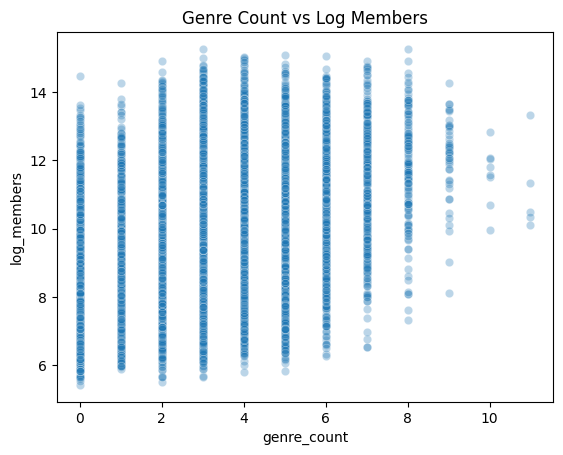

In [15]:
# genre_count와 인기 관계 시각화 (상관계수 r = 0.35)
sns.scatterplot(data = df, x = "genre_count", y = "log_members", alpha = 0.3)
plt.title("Genre Count vs Log Members")
plt.show()

Genre Count vs Log Members 그래프 해석
- 점들이 수직 분포(정수 변수라 당연하다)를 이루고 있다.
- 완만한 양의 경향을 보이며, 극단적 패턴 없다.
- 즉, 장르 다양성이 증가할수록 평균 인기도가 다소 상승하는 경향이 있으나, 효과 크기는 제한적이다.

## Producer 관계
제작 참여 규모가 인기와 관련이 있는지 검증하기 위해 producer_count와 log_members의 관계를 분석한다.

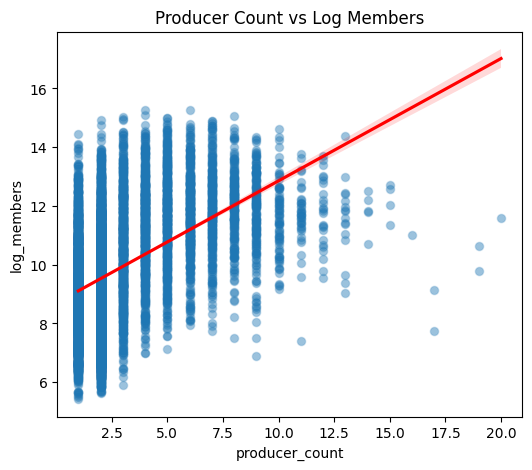

In [16]:
# log_members vs producer_count (r = 0.48)
plt.figure(figsize = (6,5))
sns.scatterplot(
    data = df,
    x = "producer_count",
    y = "log_members",
    alpha = 0.3
)
plt.title("Producer Count vs Log Members")

sns.regplot( # 선형성 확인
    data = df,
    x = "producer_count",
    y = "log_members",
    scatter_kws = {"alpha" : 0.2},
    line_kws = {"color" : "red"}
)

plt.show()

Producer Count vs Log Members 그래프 해석
- 양의 선형 경향이 있다.
- 일부 높은 producer_count 작품은 오히려 낮은 인기를 얻기도 했다.
- 즉, 제작 참여 규모는 인기와 의미 있는 양의 관계를 보이는데, 이는 산업적 투자 규모와 흥행 간의 연결 가능성을 시사한다.

-----
# EDA Summary

- 상관관계 분석 결과, 작품의 인기(log_members)는 평점(score)과 비교적 강한 양의 상관관계를 보였다(r=0.62).  
- 또한 제작 참여 규모(producer_count, company_count)는 인기와 의미 있는 상관을 보였으며, 이는 산업적 구조 요인을 시사한다.
- 반면 성우 참여 규모는 인기 및 평점과 큰 상관을 보이지 않았다.
- company_count와 producer_count 간 상관계수는 0.98로 매우 높아 다중공선성 문제가 존재하며, 모델링 단계에서 둘 중 하나를 제거할 필요가 있다.
- 따라서 이후 모델링에서는 log_members를 종속변수로 설정하고, 다중공선성을 고려하여 변수 선택을 수행한다.

최종 모델 변수 후보
- score
- genre_count
- producer_count
- studio_count
- voice_actor_count
- year
- type (더미화 필요)

In [18]:
df.to_csv("../data/processed/feature_anime.csv", index = False)